# A* Algorithm

**Input**: graph representing the map. The graph consists of nodes (points in space) and edges (connections between these points). Each edge in the graph is associated with a cost, which represents the cost of moving from one node to another. This cost can represent various factors, such as the physical distance between the nodes, the difficulty level of the path, or any other factor that affects the cost of traversing the path.

The A* algorithm starts at a given node (the start node) and tries to find the **shortest path to another node** (the goal node). It does this by maintaining **two lists**: an open list (containing nodes that need to be evaluated) and a closed list (containing nodes that have already been evaluated). The algorithm iteratively selects the node with the lowest cost from the open list, evaluates it, and moves it to the closed list. The cost of a node is determined by two factors: the actual cost to reach the node (g(n)), and the estimated cost to reach the goal from the node (h(n)). The algorithm continues this process until it finds the goal node or exhausts all possibilities.


EKF_SLAM returns a list $\mu$ of the form:
$$[x,y,\theta,x_1,y_1,\ldots, x_n,y_n]$$

We still have to take into account:
- Red & green circles
- Obstacles (red arucos)

Possible idea: consider the red and green circles as nodes. The first ones should have very low cost (maybe negative?), the red ones very hign cost.

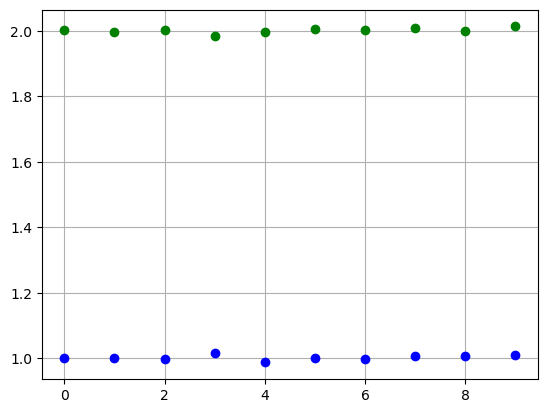

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1 for _ in range(10)], dtype=float)
y = np.array([2 for _ in range(10)], dtype=float)

# Add random noise to x and y
noise_scale = 0.01 # Adjust this value to increase or decrease the amount of noise
x += np.random.normal(0, noise_scale, x.shape)
y += np.random.normal(0, noise_scale, y.shape)

plt.plot(x, "bo")
plt.plot(y, "go")

plt.grid()
plt.show()

In [33]:
coordinates = list(zip(x, y))
coordinates

[(1.000026160911514, 2.003182744304637),
 (1.000185071845723, 1.9956077642262164),
 (0.9982204405719325, 2.0038154677218305),
 (1.017076494891702, 1.9856899114508169),
 (0.9875267061427134, 1.9961193774168182),
 (1.0020679259126584, 2.00490685217176),
 (0.9974233361812254, 2.0012427869136142),
 (1.0079146556645082, 2.007505210551926),
 (1.0079395612586328, 1.9987763761569146),
 (1.010910177784966, 2.0134895500384937)]

Possible approach:
- Robot esplores track and returns list of coordinates
- We connect them 
- 

# Example

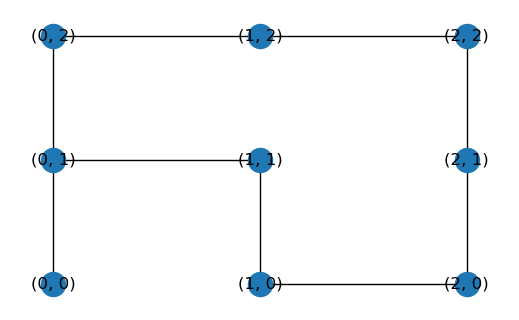

Shortest path from (0, 0) to (2, 2): [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]


In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple graph
G = nx.Graph()

# Add nodes
G.add_node((0, 0))
G.add_node((0, 1))
G.add_node((0, 2))
G.add_node((1, 0))
G.add_node((1, 1))
G.add_node((1, 2))
G.add_node((2, 0))
G.add_node((2, 1))
G.add_node((2, 2))

# Add edges and weights
G.add_edge((0, 0), (0, 1), weight=1)
G.add_edge((0, 1), (0, 2), weight=1)
G.add_edge((0, 2), (1, 2), weight=1)
G.add_edge((1, 2), (2, 2), weight=1)
G.add_edge((2, 2), (2, 1), weight=1)
G.add_edge((2, 1), (2, 0), weight=1)
G.add_edge((2, 0), (1, 0), weight=1)
G.add_edge((1, 0), (1, 1), weight=1)
G.add_edge((1, 1), (0, 1), weight=1)

# Draw the graph
plt.figure(figsize=(5, 3))
pos = {(x, y): (x, y) for x in range(3) for y in range(3)}
nx.draw(G, pos, with_labels=True)
plt.show()

# Find the shortest path using A* algorithm
start = (0, 0)
goal = (2, 2)

path = nx.astar_path(G, start, goal, heuristic=None, weight='weight')
print(f"Shortest path from {start} to {goal}: {path}")

# Example

The code below was taken from [here](https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2)

In [1]:

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0 # distance between the current node and the start node
        self.h = 0 # estimated distance from the current node to the end node
        self.f = 0 # total score of node

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [2]:
def main():

    maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (7, 6)

    path = astar(maze, start, end)
    print(path)

In [3]:
main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]
